In [1]:
import numpy as np
import pandas as pd
import networkx as nx

from algorithm.util.directed_graph import DirectedGraph
from algorithm.util.read_pairs_data import read_pairs_file, read_pairs_db
from algorithm.util.graph_vis import GraphVisualization
from algorithm.first_accept_n_way import FirstAcceptNWay

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time

In [2]:
pairs = read_pairs_db(0, 99)
pairs.head()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,P0,A,O,90
1,P1,B,A,5
2,P2,A,O,90
3,P3,A,A,92
4,P4,A,B,5


In [3]:
a = time.time()
grph = DirectedGraph(pairs)
b = time.time() - a
print(b, "s")

0.015957117080688477 s


In [4]:
grph.get_adjacency_list()

{'P0': ['P1',
  'P3',
  'P5',
  'P11',
  'P15',
  'P17',
  'P21',
  'P28',
  'P29',
  'P31',
  'P32',
  'P35',
  'P39',
  'P44',
  'P47',
  'P49',
  'P51',
  'P55',
  'P58',
  'P60',
  'P85',
  'P91',
  'P92',
  'P93',
  'P95',
  'P98',
  'P99'],
 'P1': ['P4',
  'P19',
  'P27',
  'P36',
  'P39',
  'P41',
  'P44',
  'P52',
  'P54',
  'P66',
  'P69',
  'P75',
  'P81',
  'P95'],
 'P2': ['P1',
  'P3',
  'P5',
  'P11',
  'P15',
  'P17',
  'P21',
  'P28',
  'P29',
  'P31',
  'P32',
  'P35',
  'P39',
  'P44',
  'P47',
  'P49',
  'P51',
  'P55',
  'P58',
  'P60',
  'P85',
  'P91',
  'P92',
  'P93',
  'P95',
  'P98',
  'P99'],
 'P3': ['P1',
  'P5',
  'P11',
  'P15',
  'P17',
  'P21',
  'P28',
  'P29',
  'P31',
  'P32',
  'P35',
  'P39',
  'P44',
  'P47',
  'P49',
  'P51',
  'P55',
  'P58',
  'P60',
  'P85',
  'P91',
  'P92',
  'P93',
  'P95',
  'P98',
  'P99'],
 'P4': ['P1',
  'P3',
  'P5',
  'P11',
  'P15',
  'P17',
  'P21',
  'P28',
  'P29',
  'P31',
  'P32',
  'P35',
  'P39',
  'P44',
  'P47

In [5]:
len(grph.get_edges())

3110

In [6]:
cycles = grph.get_cycles()

In [7]:
cycles

[['P1', 'P4'],
 ['P1', 'P4', 'P3'],
 ['P4', 'P3', 'P5'],
 ['P1', 'P4', 'P3', 'P5', 'P19'],
 ['P3', 'P5', 'P19'],
 ['P5', 'P19'],
 ['P4', 'P3', 'P5', 'P19', 'P11'],
 ['P19', 'P11'],
 ['P1', 'P4', 'P3', 'P5', 'P19', 'P11', 'P27'],
 ['P3', 'P5', 'P19', 'P11', 'P27'],
 ['P5', 'P19', 'P11', 'P27'],
 ['P11', 'P27'],
 ['P1', 'P4', 'P3', 'P5', 'P19', 'P11', 'P27', 'P15'],
 ['P3', 'P5', 'P19', 'P11', 'P27', 'P15'],
 ['P5', 'P19', 'P11', 'P27', 'P15'],
 ['P11', 'P27', 'P15'],
 ['P4', 'P3', 'P5', 'P19', 'P11', 'P27', 'P15', 'P17'],
 ['P19', 'P11', 'P27', 'P15', 'P17'],
 ['P27', 'P15', 'P17'],
 ['P1', 'P4', 'P3', 'P5', 'P19', 'P11', 'P27', 'P15', 'P17', 'P36'],
 ['P3', 'P5', 'P19', 'P11', 'P27', 'P15', 'P17', 'P36'],
 ['P5', 'P19', 'P11', 'P27', 'P15', 'P17', 'P36'],
 ['P11', 'P27', 'P15', 'P17', 'P36'],
 ['P15', 'P17', 'P36'],
 ['P17', 'P36'],
 ['P4', 'P3', 'P5', 'P19', 'P11', 'P27', 'P15', 'P17', 'P36', 'P21', 'P39'],
 ['P19', 'P11', 'P27', 'P15', 'P17', 'P36', 'P21', 'P39'],
 ['P27', 'P15', 'P1

In [8]:
fanway = FirstAcceptNWay(5, 'maximum')

In [9]:
a = time.time()
fanway.finalize_exchange(grph)
b = time.time() - a
print(b, "s")

0.0 s


In [10]:
def display_all(list_of_pairs):
    for p in list_of_pairs:
        display(pairs[pairs['pair_num'] == p])

In [11]:
flatten = lambda t: [item for sublist in t for item in sublist]
display_all([i for i in grph.medical_data['pair_num'] if (i not in flatten(fanway.cycles))])

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,P0,A,O,90


,pair_num,donor_bloodtype,recipient_bloodtype,pra
12,P12,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
13,P13,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
16,P16,A,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
20,P20,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
22,P22,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
23,P23,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
24,P24,A,O,90


,pair_num,donor_bloodtype,recipient_bloodtype,pra
25,P25,B,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
26,P26,A,O,90


,pair_num,donor_bloodtype,recipient_bloodtype,pra
30,P30,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
33,P33,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
34,P34,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
35,P35,B,A,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
37,P37,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
38,P38,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
42,P42,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
45,P45,B,O,90


,pair_num,donor_bloodtype,recipient_bloodtype,pra
46,P46,A,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
48,P48,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
50,P50,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
51,P51,AB,A,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
53,P53,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
56,P56,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
57,P57,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
61,P61,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
62,P62,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
64,P64,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
65,P65,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
67,P67,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
68,P68,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
70,P70,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
71,P71,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
72,P72,O,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
73,P73,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
74,P74,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
76,P76,A,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
77,P77,A,O,90


,pair_num,donor_bloodtype,recipient_bloodtype,pra
78,P78,A,O,32


,pair_num,donor_bloodtype,recipient_bloodtype,pra
79,P79,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
80,P80,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
82,P82,AB,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
83,P83,A,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
84,P84,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
86,P86,A,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
87,P87,B,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
88,P88,B,O,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
89,P89,A,O,32


,pair_num,donor_bloodtype,recipient_bloodtype,pra
90,P90,A,O,92


,pair_num,donor_bloodtype,recipient_bloodtype,pra
91,P91,B,A,28


,pair_num,donor_bloodtype,recipient_bloodtype,pra
92,P92,B,A,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
93,P93,B,A,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
94,P94,A,O,10


,pair_num,donor_bloodtype,recipient_bloodtype,pra
96,P96,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
97,P97,B,O,5


,pair_num,donor_bloodtype,recipient_bloodtype,pra
98,P98,AB,A,32


,pair_num,donor_bloodtype,recipient_bloodtype,pra
99,P99,AB,A,5


In [12]:
fanway.show_donation_mapping('text')

P1 --> P4
P3 --> P5 --> P19
P11 --> P27
P15 --> P17 --> P36
P21 --> P39 --> P41
P28 --> P29 --> P44 --> P2
P31 --> P95
P32 --> P52
P54 --> P6
P66 --> P47
P69 --> P49 --> P7
P75 --> P8 --> P55
P81 --> P58
P60 --> P9
P85 --> P10
P14 --> P18
P40 --> P43
P59 --> P63


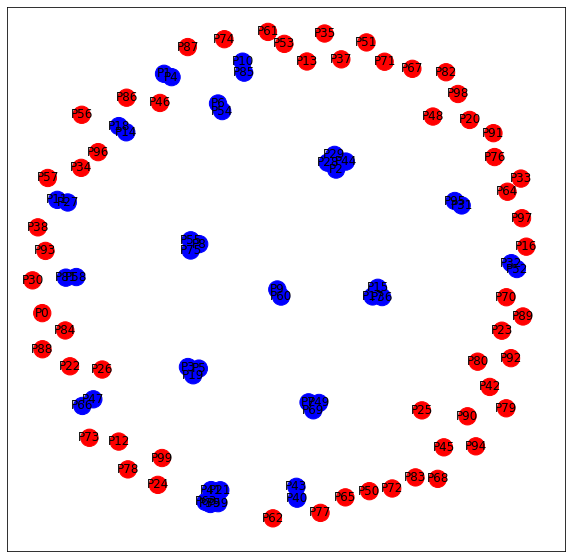

In [13]:
plt.figure(figsize=(10, 10))
fanway.show_donation_mapping('graph')

In [14]:
fanway.get_num_of_matched_pairs()

43